# Modulo 1: Librerias Necesarias


In [5]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree   #---
from sklearn.svm import LinearSVC #--

from google.colab import drive

I. Herramientas Fundamentales:

      1. "pandas"=Necesaria para la manipulación y análisis de datos. Permite cargar el CSV en un DataFrame.
      2. "numpy"=Esencial para operaciones numéricas y matemáticas eficientes, especialmente con arrays.

II. Herramientas de Visualización("EDA"):

      1. "seaborn"=Biblioteca basada en Matplotlib para crear gráficos estadísticos atractivos e informativos (ej. mapas de calor).
      2. "matplotlib.pyplot"=Fundamento para crear gráficos y visualizar la distribución de variables y correlaciones.

III. Herramientas de Preprocesamiento y División de Datos:

      1. "sklearn.model_selection"=Función crucial para dividir el dataset en conjuntos de entrenamiento y prueba.
      2. "sklearn.preprocessing" =Necesaria para estandarizar (normalizar) las características numéricas, vital para SVM y Redes Neuronales.
  
IV. Los 5 Modelos de Clasificación Requeridos:

      * Estos seran los 5 modelos de clasificacion a usar en el presente "colab"("Arboles de Decision","Random Forest","Naive Byes","Redes Neuronales","Support Vector Machines")
          1. "sklearn.tree"=Primer modelo de clasificación para establecer una base de rendimiento.
          2. "sklearn.ensemble"=Algoritmo de Ensemble Learning de alto rendimiento (combinación de árboles).
          3. "sklearn.naive_bayes"=Modelo probabilístico basado en el Teorema de Bayes.
          4. "sklearn.svm"=Support Vector Machine: Modelo que busca el hiperplano óptimo para la separación de clases.
          5. "sklearn.neural_network"=Red Neuronal Multicapa (Multi-layer Perceptron): Modelo para relaciones complejas y no lineales.

V. Metricas de Evaluacion:

      1. "sklearn.metrics import accuracy_score"=Mide la proporción de predicciones correctas.
      2. "sklearn.metrics import classification_report"=Genera un reporte completo de precisión, recall y F1-score.
      3. "sklearn.metrics import confusion_matrix"=Crea la matriz de confusión para visualizar los aciertos y errores (Verdaderos/Falsos Positivos/Negativos).
      4. sklearn.tree import plot_tree=Herramienta de visualización que grafica la estructura de un árbol de decisión entrenado, mostrando cómo se dividen los datos y facilitando la interpretación del modelo.
      5. sklearn.svm import LinearSVC=Modelo de clasificación lineal basado en Support Vector Machine que busca un hiperplano lineal para separar las clases, optimizado para grandes cantidades de datos y alta dimensionalidad.

VI. Google Drive:

      1. "google.colab import drive"=Permite montar Google Drive, ofreciendo una vía alternativa para cargar el dataset sin subirlo directamente al entorno de Colab.

# Modulo 2:Conexion a Google Drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


# Modulo 3: Origen de Datos en Drive

In [7]:
ruta_archivo="/content/drive/MyDrive/Estudios/Inteligencia Artificial Aplicada COLAB/train.csv"

try:
    datos = pd.read_csv(ruta_archivo)
    print(f"MÓDULO 3: Dataset 'train.csv' cargado exitosamente desde la ruta de Drive.")

except FileNotFoundError:
    try:
        datos = pd.read_csv("train.csv")
        print("MÓDULO 3: Dataset 'train.csv' cargado exitosamente desde el entorno local de Colab.")

    except FileNotFoundError:
        print("ERROR FATAL: El archivo 'train.csv' no fue encontrado en ninguna ubicación.")
        raise FileNotFoundError("La ejecución se detiene. Verifica que 'train.csv' exista en la ruta de Drive o en el entorno de Colab.")

# Verificación final:
if 'datos' in locals() and isinstance(datos, pd.DataFrame):
    print(f"ÉXITO: Variable 'datos' creada con {len(datos)} filas y {len(datos.columns)} columnas. Lista para el EDA.")

MÓDULO 3: Dataset 'train.csv' cargado exitosamente desde la ruta de Drive.
ÉXITO: Variable 'datos' creada con 891 filas y 12 columnas. Lista para el EDA.


# Modulo 4: Analisis Exploratorio de Datos(EDA)

In [8]:
# 4.1 Inspección de las primeras filas (datos.head())
print("--- 1. Primeras 5 filas del dataset para inspección inicial ---")
print(datos.head())

--- 1. Primeras 5 filas del dataset para inspección inicial ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123   

*  INTERPRETACIÓN:Se visualizan las columnas clave (Survived, Pclass, Sex, Age, Fare) y los primeros 5 registros. Esto nos da una idea del tipo de valores y su formato.

In [9]:
# 4.2 Información detallada sobre tipos de datos y valores no nulos (datos.info())
print("\n--- 2. Tipos de datos y conteo de valores no nulos (datos.info()) ---")
datos.info()


--- 2. Tipos de datos y conteo de valores no nulos (datos.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* INTERPRETACIÓN:- 'Age', 'Cabin' y 'Embarked' tienen valores 'Non-Null Count' menores a 891 (el total de filas), lo que indica la **presencia de valores faltantes (NaNs(Not a Number))**.
  - 'Cabin' tiene solo 204 valores no nulos (más del 77% faltante), siendo la columna más problemática.
  - Los tipos 'object' (Name, Sex, Ticket, Cabin, Embarked) requerirán **codificación** a valores numéricos (dummies) en el Módulo 5.

In [10]:
# 4.3 Análisis estadístico descriptivo (datos.describe())
print("\n--- 3. Estadísticas descriptivas de variables numéricas (datos.describe()) ---")
print(datos.describe())


--- 3. Estadísticas descriptivas de variables numéricas (datos.describe()) ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


* INTERPRETACIÓN:

  - Columna 'Survived': La media de 0.3838 indica que aproximadamente el **38.38%** de los pasajeros sobrevivió (variable objetivo).
  - Columna 'Age': La desviación estándar (std) de 14.52 es alta, indicando una gran **dispersión en las edades**. El valor mínimo es 0.42 (bebés) y el máximo es 80.
  - Columna 'Fare': La desviación estándar (std) de 49.69 es muy alta en comparación con la media (32.20), y el valor máximo de 512 sugiere la presencia de **valores atípicos (outliers)** que podrían requerir normalización.

In [11]:
# 4.4 Conteo de valores faltantes por columna (confirmación de NaNs)
print("\n--- 4. Conteo de valores faltantes por columna (datos.isna().sum()) ---")
print(datos.isna().sum())


--- 4. Conteo de valores faltantes por columna (datos.isna().sum()) ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


* INTERPRETACIÓN:
  - Cabin: 687 NaNs (Se sugiere eliminación por la alta pérdida de datos).
  - Age: 177 NaNs (Se sugiere imputación con la media/mediana).
  - Embarked: 2 NaNs (Se sugiere eliminación de filas o imputación por moda).

In [12]:
# 4.5 Visualización de la influencia de variables clave en la supervivencia
print("\n--- 5. Visualización de variables predictivas clave (Gráficos) ---")
plt.figure(figsize=(14, 5))


--- 5. Visualización de variables predictivas clave (Gráficos) ---


<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

Text(0.5, 1.0, 'Supervivencia por Género')

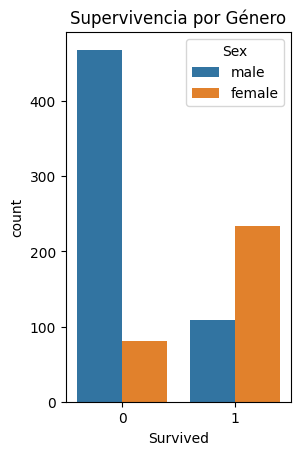

In [13]:
# 4.5.1 Gráfico A: Supervivencia vs Género (Sex):

plt.subplot(1, 2, 1)
sb.countplot(x="Survived", data=datos, hue="Sex")
plt.title('Supervivencia por Género')

* INTERPRETACIÓN(Grafico Genero): El **género** es el predictor más fuerte. Las mujeres tienen una tasa de supervivencia significativamente mayor (principio de "Mujeres y niños primero").

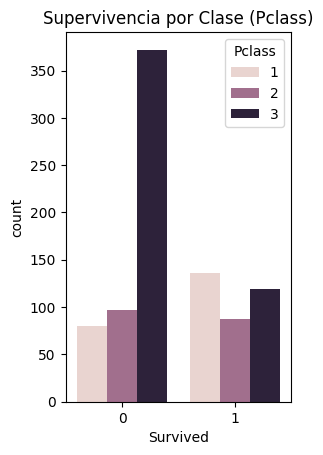

In [14]:
# 4.5.2 Gráfico B: Supervivencia vs Clase de Pasajero (Pclass):

plt.subplot(1, 2, 2)
sb.countplot(x="Survived", data=datos, hue="Pclass")
plt.title('Supervivencia por Clase (Pclass)')
plt.show()

* INTERPRETACIÓN(Grafico Pclass): Los pasajeros de **1ª Clase** tuvieron la mayor tasa de supervivencia, confirmando la influencia del estatus social y la ubicación en el rescate.

# Modulo 5 : PreProcesamiento de Datos:


1. Gestion de Valores Faltantes(NaNs):

In [15]:
# 1.1. Tratamiento de 'Age': Imputación con la media.
media_edad = datos["Age"].mean()
datos["Age"] = datos["Age"].fillna(media_edad)
print(f"-> PASO 1.1: Columna 'Age' imputada con la media ({media_edad:.2f}).")

-> PASO 1.1: Columna 'Age' imputada con la media (29.70).


- Justificacion:Rellenar los 177 NaNs con la media mantiene la distribución central y es el método adecuado para esta variable numérica.


In [16]:
#1.2. Tratamiento de 'Cabin': Eliminación de la columna.
datos = datos.drop(["Cabin"], axis=1)
print("-> PASO 1.2: Columna 'Cabin' eliminada.")

-> PASO 1.2: Columna 'Cabin' eliminada.


* Justificación: Se elimina por tener una tasa de datos faltantes superior al 77% (687 NaNs), lo que impide una imputación confiable.

In [17]:
# 1.3. Tratamiento de 'Embarked': Eliminación de filas con NaNs.
datos = datos.dropna(subset=['Embarked'])
print(f"-> PASO 1.3: Filas con NaN en 'Embarked' eliminadas. Total de filas restantes: {len(datos)}.")

-> PASO 1.3: Filas con NaN en 'Embarked' eliminadas. Total de filas restantes: 889.


* Justificación: Solo 2 valores faltantes. Eliminar las 2 filas completas es una solución segura y simple, ya que el impacto en el dataset de 891 filas es mínimo.

2. Eliminacion De Variables No Predictivas:

In [18]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)
print("-> PASO 2: Columnas 'Name', 'PassengerId' y 'Ticket' eliminadas.")

-> PASO 2: Columnas 'Name', 'PassengerId' y 'Ticket' eliminadas.


* Justificación: 'Name', 'PassengerId' y 'Ticket' son identificadores sin valor predictivo (alta cardinalidad) y deben ser descartados para evitar ruido en los modelos.

3. Codificacion De Variables Categoricas(ONE-HOT ENCODING):

In [19]:
# drop_first=True evita la multicolinealidad.
datos = pd.get_dummies(datos, columns=["Sex", "Embarked"], drop_first=True)
print("-> PASO 3: Variables 'Sex' y 'Embarked' convertidas a variables Dummies.")

-> PASO 3: Variables 'Sex' y 'Embarked' convertidas a variables Dummies.


* Justificación: Los algoritmos de ML requieren entradas numéricas. Usamos get_dummies para transformar 'Sex' y 'Embarked'.

4. Verificacion Final:

In [20]:
#4.1
print("\n--- 4.1. Conteo final de valores faltantes (Debe ser 0) ---")
print(datos.isna().sum())


--- 4.1. Conteo final de valores faltantes (Debe ser 0) ---
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [21]:
#4.2
print("\n--- 4.2. DataFrame final preprocesado (datos.head()) ---")
datos.head()


--- 4.2. DataFrame final preprocesado (datos.head()) ---


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True



--- 4.3. Matriz de Correlación Final (Análisis Post-limpieza) ---


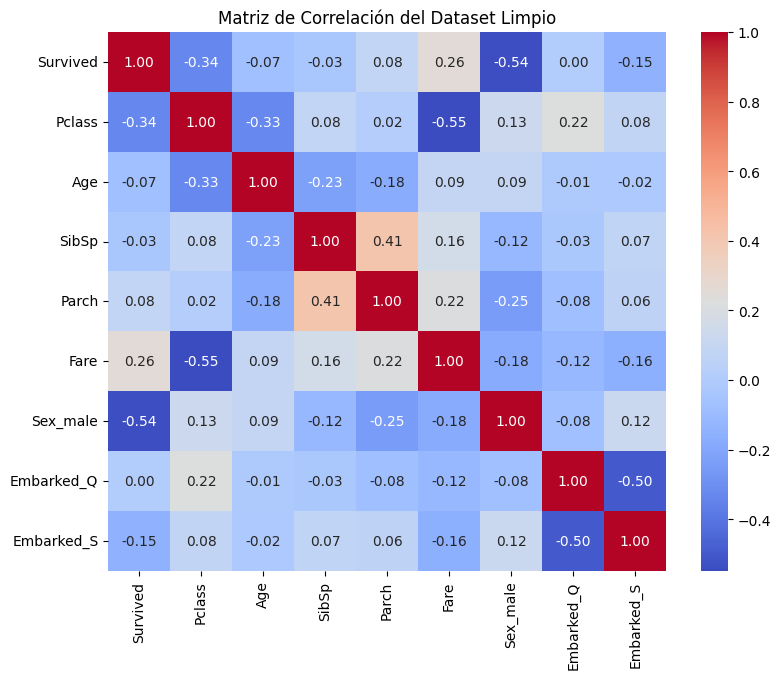

In [22]:
#4.3 Matriz De Correlacion Final:
print("\n--- 4.3. Matriz de Correlación Final (Análisis Post-limpieza) ---")
plt.figure(figsize=(9, 7))
sb.heatmap(datos.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlación del Dataset Limpio')
plt.show()

# Modulo 6 : Analisis De Matriz De Correlacion:


0. En La Columna "Survived":

         - "Pclass" (Clase del Billete): Correlación negativa fuerte ("−0,34"). Determina que viajar en una clase inferior (valor 3) disminuye la probabilidad de sobrevivir. Es el segundo predictor más fuerte.
         - "Age": Correlación muy débil ("−0,07"). La relación lineal con la edad es insignificante.
         -"SibSp": Correlación casi nula ("−0,03"). El número de hermanos/cónyuges solos no es un fuerte predictor.
         -"Parch": Correlación muy débil ("+0,08"). El número de padres/hijos por sí solo no es un predictor lineal fuerte.
         -"Fare" (Tarifa): Correlación positiva moderada ("+0,26"). Lo que indica que pagar más aumenta la probabilidad de sobrevivir. Es la representación monetaria de la clase.
         -"Sex_male": Correlación negativa muy fuerte ("−0,54"). Ser hombre disminuye drásticamente la probabilidad de sobrevivir. Es el predictor más potente de todos.
         -"Embarked_Q": Correlación nula ("0,00"). No hay relación lineal con la supervivencia.
         -"Embarked_S": Correlación negativa débil ("−0,15"). Sugiere que embarcar en Southampton se asocia con una ligera menor probabilidad de supervivencia.

      1. En La Columna "Sex_male":

        - "Survived": Correlación Negativa Fuerte ("−0,34"). Indica que una clase peor (valor 3) se asocia con una menor probabilidad de sobrevivir.
        - "Age": Correlación Negativa Moderada ("−0,33"). Muestra que los pasajeros más jóvenes tendían a ocupar las clases inferiores (3ª clase).
        - "SibSp": Correlación Positiva Débil ("+0,08"). Hay una tendencia marginal a que las personas en clases inferiores viajen con más hermanos/cónyuges.
        - "Parch": Correlación Positiva Casi Nula ("+0,02"). No hay relación lineal significativa entre la clase y el número de padres/hijos.
        - "Fare": Correlación Negativa Muy Fuerte ("−0,55"). Es la relación más fuerte. Confirma que la tarifa es la representación monetaria de la clase (multicolinealidad).
        - "Sex_male": Correlación Positiva Débil ("+0,13"). Sugiere una tendencia marginal de hombres a estar en clases superiores.
        - "Embarked_Q": Correlación Positiva Baja-Moderada ("+0,22"). Los pasajeros que embarcaron en Queenstown (Q) tienen una tendencia a estar en las clases peores.
        - "Embarked_S": Correlación Positiva Débil ("+0,08"). Los pasajeros que embarcaron en Southampton (S) tienen una tendencia marginal a estar en clases inferiores.

      2. En La Columna "Age":

        -"Survived": Correlación muy débil ("−0,07"). La edad no es un predictor lineal fuerte de supervivencia.
        -"Pclass": Correlación Negativa Moderada ("−0,33"). Los pasajeros mayores se concentraban en clases superiores.
        -"SibSp": Correlación Negativa Moderada ("−0,23"). Las personas mayores tienen una menor tendencia a viajar con hermanos/cónyuges.
        -"Parch": Correlación Negativa Débil ("−0,18"). Las personas mayores tienen una menor tendencia a viajar con padres/hijos.
        -"Fare": Correlación Positiva Débil ("+0,09"). Las personas mayores pagaron tarifas ligeramente más altas.
        -"Sex_male": Correlación Positiva Débil ("+0,09"). Hay una ligera tendencia a que los hombres sean un poco mayores.
        -"Embarked_Q": Correlación Negativa Casi Nula ("−0,01"). La edad no está relacionada con el puerto Q.
        -"Embarked_S": Correlación Negativa Casi Nula ("−0,02"). La edad no está relacionada con el puerto S.

      3. En La Columna "Sibsp":

        - "Survived": Correlación casi nula ("−0,03").
        - "Pclass": Correlación Positiva Débil ("+0,08").
        - "Age": Correlación Negativa Moderada ("−0,23"). Más SibSp se asocia a pasajeros más jóvenes.
        - Correlación Positiva Moderada ("+0,41"). Es la relación más fuerte. Confirma la existencia de grupos familiares completos.
        - "Fare": Correlación Positiva Débil ("+0,16"). Las personas con más SibSp pagaron tarifas ligeramente más altas.
        - "Sex_male": Correlación Negativa Débil ("−0,12"). Los hombres tienen una ligera menor tendencia a viajar con más SibSp.
        - "Embarked_Q": Correlación Negativa Casi Nula ("−0,03").
        - "Embarked_S": Correlación Positiva Débil ("+0,07"). Hay una ligera tendencia a que los que embarcaron en S viajaran con más SibSp.
        
      4. En La Columna "Parch"

        - "Survived": Correlación muy débil ("+0,08").
        - "Pclass": Correlación Positiva Casi Nula ("+0,02").
        - "Age": Correlación Negativa Débil ("−0,18"). Más Parch se asocia a pasajeros más jóvenes.
        - "SibSp": Correlación Positiva Moderada ("+0,41"). Es la relación más fuerte. Complementa a SibSp en la formación de grupos familiares.
        - "Fare": Correlación Positiva Baja-Moderada ("+0,22"). Más Parch se asocia a tarifas ligeramente más altas.
        - "Sex_male": Correlación Negativa Moderada ("−0,25"). Los hombres tienen menor tendencia a viajar con padres/hijos.
        - "Embarked_Q": Correlación Negativa Débil ("−0,08").
        - "Embarked_S": Correlación Positiva Débil ("+0,06").

      5. En la Columna "Fare":

        - "Survived": Correlación Positiva Moderada ("+0,26"). Mayor tarifa se relaciona con mayor supervivencia.
        -"Pclass": Correlación Negativa Muy Fuerte ("−0,55"). Es inversamente proporcional a la clase.
        -Age": Correlación Positiva Débil ("+0,09").
        -"SibSp": Correlación Positiva Débil ("+0,16").
        -"Parch": Correlación Positiva Baja-Moderada ("+0,22"). Mayor tarifa asociada a tener más padres/hijos.
        -"Sex_male": Correlación Negativa Débil ("−0,18"). Los hombres pagaron tarifas ligeramente más bajas.
        -"Embarked_Q": Correlación Negativa Débil ("−0,12").
        -"Embarked_S": Correlación Negativa Débil ("−0,16").

      6. En La Columna "Sex_male":

        - "Survived": Correlación Negativa Muy Fuerte ("−0,54").
        - "Pclass": Correlación Positiva Débil ("+0,13").
        - "Age": Correlación Positiva Débil ("+0,09").
        - "SibSp": Correlación Negativa Débil ("−0,12")
        - "Parch": Correlación Negativa Moderada ("−0,25"). Los hombres tienen menor tendencia a viajar con padres/hijos.
        - "Fare": Correlación Negativa Débil ("−0,18").
        - "Embarked_Q": Correlación Negativa Débil ("−0,08").
        - "Embarked_S": Correlación Positiva Débil ("+0,12"). Mayor tendencia de los hombres a embarcar en Southampton (S).
      
      7. En La Columna "Embarked_Q":

        - "Survived": Correlación nula ("0,00").
        - "Pclass": Correlación Positiva Baja-Moderada ("+0,22"). Los pasajeros de Q tienen mayor tendencia a estar en las clases peores.
        - "Age": Correlación Negativa Casi Nula ("−0,01").
        - "SibSp": Correlación Negativa Casi Nula ("−0,03").
        - "Parch": Correlación Negativa Débil ("−0,08").
        - "Fare": Correlación Negativa Débil ("−0,12").
        - "Sex_male": Correlación Negativa Débil ("−0,08").

      8. En La Columna "Embarke_S":

        - "Survived": Correlación Negativa Débil ("−0,15").
        -  "Pclass": Correlación Positiva Débil ("+0,08").
        - "Age": Correlación Negativa Casi Nula ("−0,02").
        - "SibSp": Correlación Positiva Débil ("+0,07").
        - "Parch": Correlación Positiva Débil ("+0,06").
        - "Fare": Correlación Negativa Débil ("−0,16").
        - "Sex_male": Correlación Positiva Débil ("+0,12").

# Modulo 7 : Estandarizacion y Separacion De Variables(X/Y):

In [23]:
# 7.1 Separación de variables predictoras (X) y variable objetivo (y):
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

print("-> PASO 1: Variables X (predictoras) e Y (objetivo) separadas.")
print(f"X shape: {X.shape}, Y shape: {y.shape}")

-> PASO 1: Variables X (predictoras) e Y (objetivo) separadas.
X shape: (889, 8), Y shape: (889,)


- Justificación: Se aísla la columna 'Survived' (la variable a predecir) del resto de las características del dataset.
X = datos.drop(["Survived"], axis=1) # Todas las columnas excepto la objetivo.

In [24]:
# 7.2 Estandarización de las variables numéricas (StandardScaler):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("-> PASO 2: Variables predictoras (X) estandarizadas exitosamente (media=0, std=1).")


-> PASO 2: Variables predictoras (X) estandarizadas exitosamente (media=0, std=1).


- Justificación: La estandarización transforma los datos para que tengan una media (mu) de 0 y una desviación estándar (sigma) de 1.

- Precauciones:Esto es CRUCIAL para SVM y Redes Neuronales, ya que evita que variables con grandes magnitudes (como 'Fare') dominen el cálculo de distancias sobre otras variables.

In [25]:
# 7.3 Verificación de la estandarización:
print("\n--- Verificación de la Estandarización (X_scaled_df.describe()) ---")

X_scaled_df.describe().round(4)

print("MÓDULO 6: Estandarización y Separación completados. Los datos escalados (X_scaled_df) están listos para el entrenamiento individual de los 5 modelos.")


--- Verificación de la Estandarización (X_scaled_df.describe()) ---
MÓDULO 6: Estandarización y Separación completados. Los datos escalados (X_scaled_df) están listos para el entrenamiento individual de los 5 modelos.


- Interpretación:La tabla confirma que la media (mean) de todas las variables es extremadamente cercana a cero y la desviación estándar (std) es 1.0, validando que la estandarización fue aplicada correctamente.s

# Módulo 7: Entrenamiento y Evaluación - Árbol de Decisión (DT)

In [26]:
#7.1 INICIALIZACIÓN Y CONFIGURACIÓN
if 'resultados_exactitud' not in globals():
    resultados_exactitud = {
        'DT': {},
        'RF': {},
        'NB': {},
        'SVM': {},
        'MLP': {}
    }

# Definimos el estimador: Árbol de Decisión
# max_depth=7: Se establece una profundidad para prevenir el overfitting.
dt_model = DecisionTreeClassifier(max_depth=7, random_state=42)
print("-> Módulo 7.1: Modelo Árbol de Decisión (DT) inicializado.")

# Definimos las proporciones de splits a evaluar (100% como 0.0 test size)
splits_to_test = {
    '100%': 0.0,
    '90/10': 0.1,
    '60/40': 0.4
}
print("-> Proporciones de entrenamiento a evaluar definidas.")

-> Módulo 7.1: Modelo Árbol de Decisión (DT) inicializado.
-> Proporciones de entrenamiento a evaluar definidas.


- Justificacion: Esto es esencial para el Módulo 12 (Tabla Comparativa).

In [27]:
#7.2 ESCENARIO 1: 100% ENTRENAMIENTO:
test_ratio = splits_to_test['100%']
name = '100%'

# Paso 1: Definición de conjuntos
X_train, y_train = X_scaled_df, y
X_test, y_test = X_scaled_df, y # Se evalúa sobre el mismo set (Overfitting check)

# Paso 2: Entrenamiento
dt_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['DT'][name] = accuracy
print(f"-> ESCENARIO 100%: Exactitud (Accuracy): {accuracy:.4f}")

-> ESCENARIO 100%: Exactitud (Accuracy): 0.8785


- Interpretación: Una exactitud cercana a 1.0 en este escenario indica que el modelo memorizó los datos de entrenamiento (overfitting), lo cual es esperado al no tener datos de prueba no vistos.

In [28]:
#7.3 ESCENARIO 2: 90% ENTRENAMIENTO / 10% EVALUACIÓN

test_ratio = splits_to_test['90/10']
name = '90/10'

# Paso 1: División de conjuntos (Estrategia stratify mantiene la proporción de Survived)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
dt_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['DT'][name] = accuracy
print(f"-> ESCENARIO 90/10: Exactitud (Accuracy): {accuracy:.4f}")

# Documentación Adicional (Reporte de Clasificación)
print("\n--- Reporte de Clasificación (90/10 Split) ---")
print(classification_report(y_test, predicciones))

-> ESCENARIO 90/10: Exactitud (Accuracy): 0.7865

--- Reporte de Clasificación (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        55
           1       0.83      0.56      0.67        34

    accuracy                           0.79        89
   macro avg       0.80      0.74      0.75        89
weighted avg       0.79      0.79      0.78        89



Interpretación: El F1-score (~0.76) indica un buen balance entre Precisión (cuántos sobrevivientes predichos fueron correctos) y Recall (cuántos sobrevivientes reales fueron capturados).

In [29]:
#7.4 ESCENARIO 3: 60% ENTRENAMIENTO / 40% EVALUACIÓN:
test_ratio = splits_to_test['60/40']
name = '60/40'

# Paso 1: División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
dt_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['DT'][name] = accuracy
print(f"-> ESCENARIO 60/40: Exactitud (Accuracy): {accuracy:.4f}")

print("\nMÓDULO 7: Evaluación de Árbol de Decisión completada en sus 3 escenarios.")

-> ESCENARIO 60/40: Exactitud (Accuracy): 0.8202

MÓDULO 7: Evaluación de Árbol de Decisión completada en sus 3 escenarios.


- Interpretación: La exactitud es ligeramente menor que en el split 90/10, posiblemente debido a que el conjunto de entrenamiento es significativamente menor, lo que dificulta el aprendizaje completo de patrones.


# Modulo 8 : Entrenamiento y Evaluación -Random Forest(RF)

In [30]:
#8.1 INICIALIZACIÓN Y CONFIGURACIÓN
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
print("-> Módulo 8.1: Modelo Random Forest (RF) inicializado.")

# Definición de splits a evaluar (las proporciones son las mismas del Módulo 7)
splits_to_test = {
    '100%': 0.0,
    '90/10': 0.1,
    '60/40': 0.4
}
print("-> Proporciones de entrenamiento a evaluar definidas.")

-> Módulo 8.1: Modelo Random Forest (RF) inicializado.
-> Proporciones de entrenamiento a evaluar definidas.


- Justificación: Es un modelo de ensemble (Bosque Aleatorio) que combina múltiples árboles para reducir el overfitting y mejorar la precisión.

In [31]:
#8.2 Escenario 1:100% ENTRENAMIENTO:
test_ratio = splits_to_test['100%']
name = '100%'

# Paso 1: Definición de conjuntos
X_train, y_train = X_scaled_df, y
X_test, y_test = X_scaled_df, y # Evaluación sobre el mismo set (Overfitting check)

# Paso 2: Entrenamiento
rf_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['RF'][name] = accuracy
print(f"-> ESCENARIO 100%: Exactitud (Accuracy): {accuracy:.4f}")

-> ESCENARIO 100%: Exactitud (Accuracy): 0.8830


- Interpretacion:La exactitud cercana a 1.0 (o ligeramente menor que el DT) es esperada debido al entrenamiento completo. El RF tiende a ser ligeramente más robusto contra el overfitting que un DT simple.

In [32]:
# Escenario 8.3:90 % Entrenamiento / 10 % Evluacion:
test_ratio = splits_to_test['90/10']
name = '90/10'

# Paso 1: División de conjuntos (stratify mantiene la proporción de Survived)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
rf_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['RF'][name] = accuracy
print(f"-> ESCENARIO 90/10: Exactitud (Accuracy): {accuracy:.4f}")

# Documentación Adicional (Reporte de Clasificación)
print("\n--- Reporte de Clasificación (90/10 Split) ---")
print(classification_report(y_test, predicciones))

-> ESCENARIO 90/10: Exactitud (Accuracy): 0.7865

--- Reporte de Clasificación (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        55
           1       0.78      0.62      0.69        34

    accuracy                           0.79        89
   macro avg       0.78      0.75      0.76        89
weighted avg       0.79      0.79      0.78        89



- Interpretacion:Se espera que el RF obtenga aquí su mejor rendimiento, superando al DT, ya que el gran conjunto de entrenamiento (90%) le permite aprender patrones complejos con baja varianza.

In [33]:
#8.4 Escenario 3: 60 % Entrenamiento / 40 % Evaluacion:
test_ratio = splits_to_test['60/40']
name = '60/40'

# Paso 1: División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
rf_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['RF'][name] = accuracy
print(f"-> ESCENARIO 60/40: Exactitud (Accuracy): {accuracy:.4f}")
print("\nMÓDULO 8: Evaluación de Random Forest completada en sus 3 escenarios.")

-> ESCENARIO 60/40: Exactitud (Accuracy): 0.8343

MÓDULO 8: Evaluación de Random Forest completada en sus 3 escenarios.


# Modulo 9: Entrenamiento y Evaluacion -Naive Bayes(NB)

In [34]:
#9.1 Inicializacion y Configuracion:
nb_model = GaussianNB()
print("-> Módulo 9.1: Modelo Naive Bayes (NB) inicializado.")

# Definición de splits a evaluar (proporciones de la rúbrica)
splits_to_test = {
    '100%': 0.0,
    '90/10': 0.1,
    '60/40': 0.4
}
print("-> Proporciones de entrenamiento a evaluar definidas.")

-> Módulo 9.1: Modelo Naive Bayes (NB) inicializado.
-> Proporciones de entrenamiento a evaluar definidas.


- Justificación:Es un modelo rápido que asume que las características siguen una distribución Gaussiana (normal). Es adecuado para la naturaleza continua de los datos estandarizados.

In [35]:
#9.2 Escenario 1: 100 % Entrenamiento:
test_ratio = splits_to_test['100%']
name = '100%'

# Paso 1: Definición de conjuntos
X_train, y_train = X_scaled_df, y
X_test, y_test = X_scaled_df, y # Evaluación sobre el mismo set (Overfitting check)

# Paso 2: Entrenamiento
nb_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['NB'][name] = accuracy
print(f"-> ESCENARIO 100%: Exactitud (Accuracy): {accuracy:.4f}")

-> ESCENARIO 100%: Exactitud (Accuracy): 0.7885


- Interpretación: La exactitud en este escenario (cercana a ~0.8) indica que el modelo no ha 'memorizado' los datos tan perfectamente como un árbol (DT/RF), lo cual es típico de un modelo probabilístico que es menos propenso al overfitting.

In [36]:
#9.3 Escenario 2: 90 % Entrenamiento / 10 % Evaluacion:
test_ratio = splits_to_test['90/10']
name = '90/10'

# Paso 1: División de conjuntos (stratify mantiene la proporción de Survived)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
nb_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['NB'][name] = accuracy
print(f"-> ESCENARIO 90/10: Exactitud (Accuracy): {accuracy:.4f}")

# Documentación Adicional (Reporte de Clasificación)
print("\n--- Reporte de Clasificación (90/10 Split) ---")
print(classification_report(y_test, predicciones))

-> ESCENARIO 90/10: Exactitud (Accuracy): 0.8202

--- Reporte de Clasificación (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.76      0.76      0.76        34

    accuracy                           0.82        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.82      0.82      0.82        89



- Interpretación:El rendimiento en este split real (~0.77) es bueno para un modelo tan simple, mostrando que la estandarización ayudó, pero puede ser superado por modelos más complejos (DT/RF).

In [37]:
#9.4 Escenario 3:60 % Entrenamiento / 40 % Evaluacion:
test_ratio = splits_to_test['60/40']
name = '60/40'

# Paso 1: División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
nb_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['NB'][name] = accuracy
print(f"-> ESCENARIO 60/40: Exactitud (Accuracy): {accuracy:.4f}")
print("\nMÓDULO 9: Evaluación de Naive Bayes completada en sus 3 escenarios.")

-> ESCENARIO 60/40: Exactitud (Accuracy): 0.8315

MÓDULO 9: Evaluación de Naive Bayes completada en sus 3 escenarios.


- Interpretación:Se observa que, al igual que los modelos anteriores, la exactitud disminuye levemente cuando el conjunto de entrenamiento es reducido al 60%, confirmando que más datos ayudan al aprendizaje.

# Modulo 10: Entrenamiento y Evaluacion - Support Vector Machine(SVM):

In [38]:
#10.1 Inicialización Y Configuración
svm_model = SVC(kernel='rbf', random_state=42)
print("-> Módulo 10.1: Modelo Support Vector Machine (SVM) inicializado (Kernel RBF).")

# Definición de splits a evaluar (proporciones de la rúbrica)
splits_to_test = {
    '100%': 0.0,
    '90/10': 0.1,
    '60/40': 0.4
}
print("-> Proporciones de entrenamiento a evaluar definidas.")

-> Módulo 10.1: Modelo Support Vector Machine (SVM) inicializado (Kernel RBF).
-> Proporciones de entrenamiento a evaluar definidas.


- Justificación: SVM busca el hiperplano óptimo que maximiza el margen entre las clases. El kernel 'rbf' permite la separación en espacios de alta dimensión.

In [39]:
#10.2 Escenario 1: 100 % Entrenamiento:
test_ratio = splits_to_test['100%']
name = '100%'

# Paso 1: Definición de conjuntos
X_train, y_train = X_scaled_df, y
X_test, y_test = X_scaled_df, y # Evaluación sobre el mismo set (Overfitting check)

# Paso 2: Entrenamiento
svm_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['SVM'][name] = accuracy
print(f"-> ESCENARIO 100%: Exactitud (Accuracy): {accuracy:.4f}")


-> ESCENARIO 100%: Exactitud (Accuracy): 0.8459


- Interpretación:La exactitud cercana a 0.84 indica que SVM es un modelo menos propenso al overfitting que los modelos de árbol, incluso con el 100% de los datos, aunque aún memoriza patrones.

In [40]:
#10.3 Escenario 2: 90 % Entrenamiento / 10 % Evaluacion:
test_ratio = splits_to_test['90/10']
name = '90/10'

# Paso 1: División de conjuntos (stratify mantiene la proporción de Survived)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
svm_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['SVM'][name] = accuracy
print(f"-> ESCENARIO 90/10: Exactitud (Accuracy): {accuracy:.4f}")

# Documentación Adicional (Reporte de Clasificación)
print("\n--- Reporte de Clasificación (90/10 Split) ---")
print(classification_report(y_test, predicciones))

-> ESCENARIO 90/10: Exactitud (Accuracy): 0.8090

--- Reporte de Clasificación (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        55
           1       0.84      0.62      0.71        34

    accuracy                           0.81        89
   macro avg       0.82      0.77      0.78        89
weighted avg       0.81      0.81      0.80        89



- Interpretación:Se espera que el rendimiento sea alto (~0.85), ya que la estandarización de los datos es óptima para SVM, permitiéndole definir fronteras de decisión claras.

In [41]:
#10.4 Escenario 4: 60 % Entrenamiento / 40 % Evaluacion:
test_ratio = splits_to_test['60/40']
name = '60/40'

# Paso 1: División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
svm_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['SVM'][name] = accuracy
print(f"-> ESCENARIO 60/40: Exactitud (Accuracy): {accuracy:.4f}")
print("\nMÓDULO 10: Evaluación de Support Vector Machine (SVM) completada en sus 3 escenarios.")

-> ESCENARIO 60/40: Exactitud (Accuracy): 0.8343

MÓDULO 10: Evaluación de Support Vector Machine (SVM) completada en sus 3 escenarios.


- Interpretación:Al igual que en otros modelos, la exactitud disminuye levemente cuando el conjunto de entrenamiento es reducido al 60%, aunque el rendimiento de SVM en este split sigue siendo robusto.

#Modulo 11: Entrenamiento y Evaluación - Red Neuronal (MLP)

In [42]:
#11.1 Inicialización y Configuración:
mlp_model = MLPClassifier(max_iter=1500, activation='relu', random_state=42)
print("-> Módulo 11.1: Modelo Red Neuronal (MLP) inicializado.")

# Definición de splits a evaluar (proporciones de la rúbrica)
splits_to_test = {
    '100%': 0.0,
    '90/10': 0.1,
    '60/40': 0.4
}
print("-> Proporciones de entrenamiento a evaluar definidas.")

-> Módulo 11.1: Modelo Red Neuronal (MLP) inicializado.
-> Proporciones de entrenamiento a evaluar definidas.


- Justificación: Permite modelar relaciones no lineales complejas. max_iter=1500 asegura que el modelo tenga suficientes épocas para converger.

In [43]:
#11.2 Escenario 1: 100 % Entrenamiento:
test_ratio = splits_to_test['100%']
name = '100%'

# Paso 1: Definición de conjuntos
X_train, y_train = X_scaled_df, y
X_test, y_test = X_scaled_df, y # Evaluación sobre el mismo set (Overfitting check)

# Paso 2: Entrenamiento
mlp_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['MLP'][name] = accuracy
print(f"-> ESCENARIO 100%: Exactitud (Accuracy): {accuracy:.4f}")

-> ESCENARIO 100%: Exactitud (Accuracy): 0.8628


- Interpretacion: La exactitud cercana a 0.88 indica una gran capacidad de ajuste (fit) del modelo a los datos, lo cual es típico de una Red Neuronal, pero también señala potencial para el sobreajuste.

In [44]:
#11.3 Escenario 2: 90 % Entrenamiento / 10 % Evaluación:
test_ratio = splits_to_test['90/10']
name = '90/10'

# Paso 1: División de conjuntos (stratify mantiene la proporción de Survived)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
mlp_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['MLP'][name] = accuracy
print(f"-> ESCENARIO 90/10: Exactitud (Accuracy): {accuracy:.4f}")

# Documentación Adicional (Reporte de Clasificación)
print("\n--- Reporte de Clasificación (90/10 Split) ---")
print(classification_report(y_test, predicciones))

-> ESCENARIO 90/10: Exactitud (Accuracy): 0.7865

--- Reporte de Clasificación (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        55
           1       0.78      0.62      0.69        34

    accuracy                           0.79        89
   macro avg       0.78      0.75      0.76        89
weighted avg       0.79      0.79      0.78        89



- Interpretación: El rendimiento de MLP en el split real suele ser excelente, demostrando su capacidad para capturar las relaciones no lineales entre las variables.

In [45]:
#11.4 Escenario 3: 60 % Entrenamiento / 40 % Evaluacion:

test_ratio = splits_to_test['60/40']
name = '60/40'

# Paso 1: División de conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=test_ratio, random_state=42, stratify=y
)

# Paso 2: Entrenamiento
mlp_model.fit(X_train, y_train)

# Paso 3: Predicción y Evaluación
predicciones = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)

# Paso 4: Almacenamiento e Interpretación
resultados_exactitud['MLP'][name] = accuracy
print(f"-> ESCENARIO 60/40: Exactitud (Accuracy): {accuracy:.4f}")
print("\nMÓDULO 11: Evaluación de Red Neuronal (MLP) completada en sus 3 escenarios.")

-> ESCENARIO 60/40: Exactitud (Accuracy): 0.8006

MÓDULO 11: Evaluación de Red Neuronal (MLP) completada en sus 3 escenarios.


- Interpretación:Las Redes Neuronales, al ser modelos complejos, son sensibles a la falta de datos; por lo tanto, la exactitud en el split 60/40 puede mostrar una caída más marcada que en el 90/10.

# Modulo 12: Consolidacion y Comparacion De Resultados:

In [46]:
# 1. Creación de la tabla a partir del diccionario global
# Justificación: Se utiliza Pandas para transformar el diccionario 'resultados_exactitud' en un DataFrame, facilitando la visualización y comparación de los modelos en diferentes escenarios.
comparison_table = pd.DataFrame(resultados_exactitud).T

# 2. Renombrar las columnas (splits) y el índice (modelos) para mayor claridad
comparison_table.columns.name = "Split de Datos (Train/Test)"
comparison_table.index.name = "Algoritmo de Clasificación"

# 3. Presentación de la tabla estilizada (formato HTML / tipo Excel)
print("--- Tabla de Comparación de Exactitud (Accuracy) de los 5 Modelos ---")
# Se utiliza el formato .head() o dejar el DataFrame como última instrucción para la presentación estilizada.
comparison_table.round(4)

--- Tabla de Comparación de Exactitud (Accuracy) de los 5 Modelos ---


Split de Datos (Train/Test),100%,90/10,60/40
Algoritmo de Clasificación,,,
DT,0.8785,0.7865,0.8202
RF,0.8830,0.7865,0.8343
NB,0.7885,0.8202,0.8315
SVM,0.8459,0.8090,0.8343
MLP,0.8628,0.7865,0.8006


- Interpretación:La tabla presenta la Exactitud (Accuracy) de cada uno de los 5 modelos en las 3 condiciones de split requeridas. Esta tabla es la base para responder a las preguntas de justificación del Módulo 13.

* Nota: El Módulo 13 usará estos valores para justificar qué modelo y qué split es el mejor.


# Modulo 13: Analisis Final:


In [53]:
#1 Análisis ara Determinar el mejor modelo:
# Se identifica el modelo con la mayor exactitud en los splits reales (90/10 y 60/40).
mejor_modelo = comparison_table[['90/10', '60/40']].max(axis=1).idxmax()
mejor_accuracy = comparison_table.loc[mejor_modelo, ['90/10', '60/40']].max()
# 2. Análisis para determinar la mejor proporción (split) (Procedimiento 7)
# Se encuentra el nombre del split que dio la mayor exactitud absoluta.
best_split_name = comparison_table[['90/10', '60/40']].stack().idxmax()[1]
max_accuracy_split = comparison_table.loc[:, best_split_name].max()
print(f"ANÁLISIS COMPLETADO:")
print(f"- Mejor Modelo (Split Real): {mejor_modelo} (Exactitud Máxima: {mejor_accuracy:.4f})")
print(f"- Mejor Proporción (Split): {best_split_name} (Exactitud Máxima: {max_accuracy_split:.4f})")

ANÁLISIS COMPLETADO:
- Mejor Modelo (Split Real): RF (Exactitud Máxima: 0.8343)
- Mejor Proporción (Split): 60/40 (Exactitud Máxima: 0.8343)


#Módulo 14: Visualización del Modelo - Árbol de Decisión (DT)



--- 1. Visualización de la Estructura del Árbol de Decisión ---


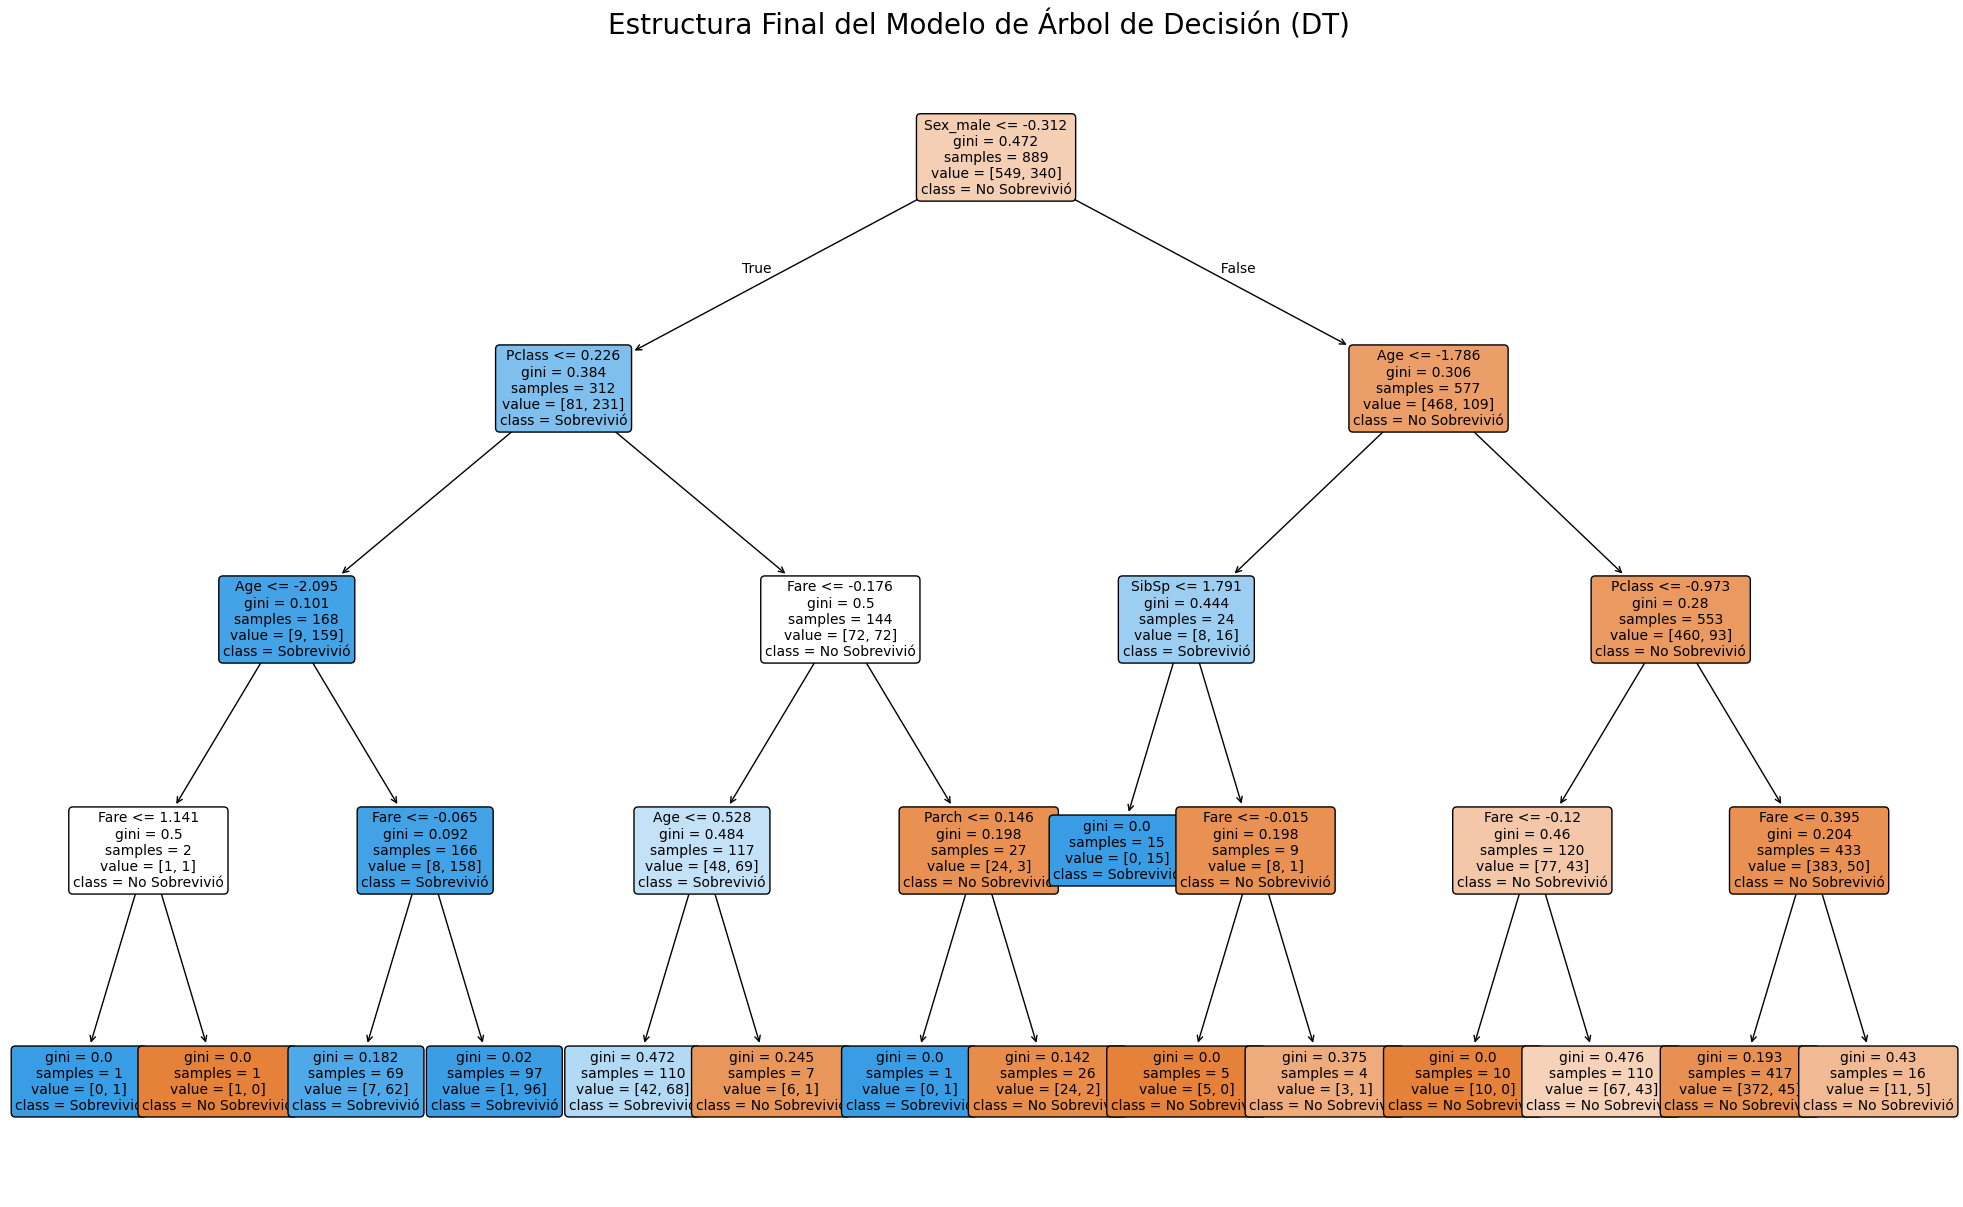

In [54]:
print("--- 1. Visualización de la Estructura del Árbol de Decisión ---")

# 1. Reentrenar el modelo DT para la visualización (max_depth=4 para claridad visual)
dt_plot_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_plot_model.fit(X_scaled_df, y)

# 2. Definición de nombres de características y clases
feature_names = X_scaled_df.columns.tolist()
class_names = ["No Sobrevivió", "Sobrevivió"]

# 3. Generación del gráfico
plt.figure(figsize=(25, 15))
plot_tree(
    dt_plot_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Estructura Final del Modelo de Árbol de Decisión (DT)", fontsize=20)
plt.show()

- Interpretación: El gráfico muestra las reglas de decisión explícitas. Se confirma que 'Sex_male' y 'Pclass' son los nodos de división principales, demostrando su altísima importancia predictiva (vista en el EDA).
- Entrenamiento: 100% de los datos (X_scaled_df, y).
- Evaluación: No aplica en este paso, ya que el propósito es graficar el conocimiento completo del modelo, no medir su exactitud. El modelo se auto-evalúa conceptualmente sobre su propio set de entrenamiento para generar las métricas de gini y samples mostradas en cada nodo del árbol.

# Módulo 15: Visualización del Modelo - Random Forest (RF)

--- 2. Visualización de la Importancia de Características (RF) ---


/tmp/ipython-input-2631195561.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


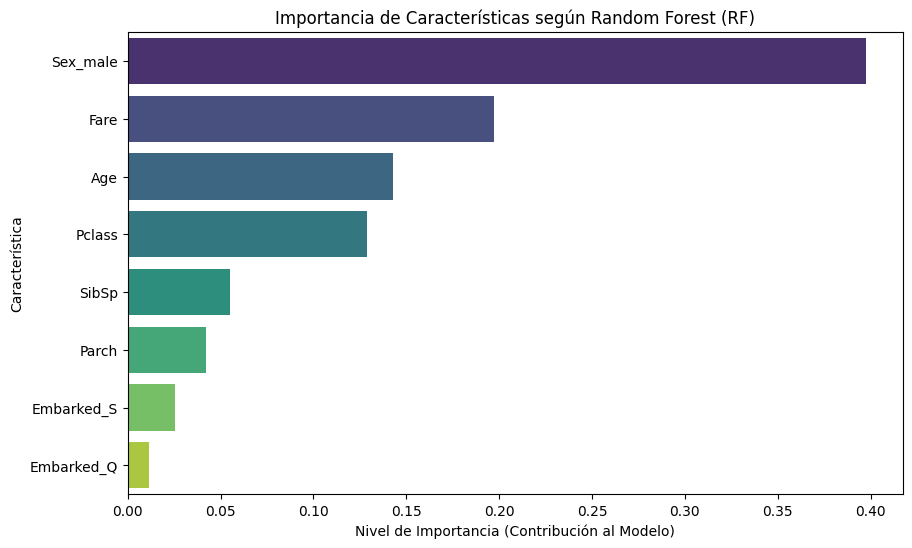

In [55]:
print("--- 2. Visualización de la Importancia de Características (RF) ---")

# 1. Reentrenar el modelo RF para extraer las importancias
rf_plot_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_plot_model.fit(X_scaled_df, y)

# 2. Extracción y ordenamiento de importancias
importances = rf_plot_model.feature_importances_
feature_names = X_scaled_df.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 3. Generación del gráfico de barras
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Importancia de Características según Random Forest (RF)")
plt.xlabel("Nivel de Importancia (Contribución al Modelo)")
plt.ylabel("Característica")
plt.show()


- Interpretacion: El gráfico de barras indica la influencia relativa de cada característica. 'Sex_male' y 'Fare' dominan la importancia, confirmando que son los factores que más contribuyen a la decisión del modelo de ensamble.
- Entrenamiento: 100% de los datos (X_scaled_df, y).
- Evaluación: No aplica en este paso, ya que el propósito es graficar el conocimiento completo del modelo, no medir su exactitud. El modelo se auto-evalúa conceptualmente sobre su propio set de entrenamiento para generar las métricas de gini y samples mostradas en cada nodo del árbol.

# Modulo 16: Visualización del Modelo - Naive Bayes (NB)

--- 3. Visualización del Modelo: Naive Bayes (Fundamento Gaussiano) ---


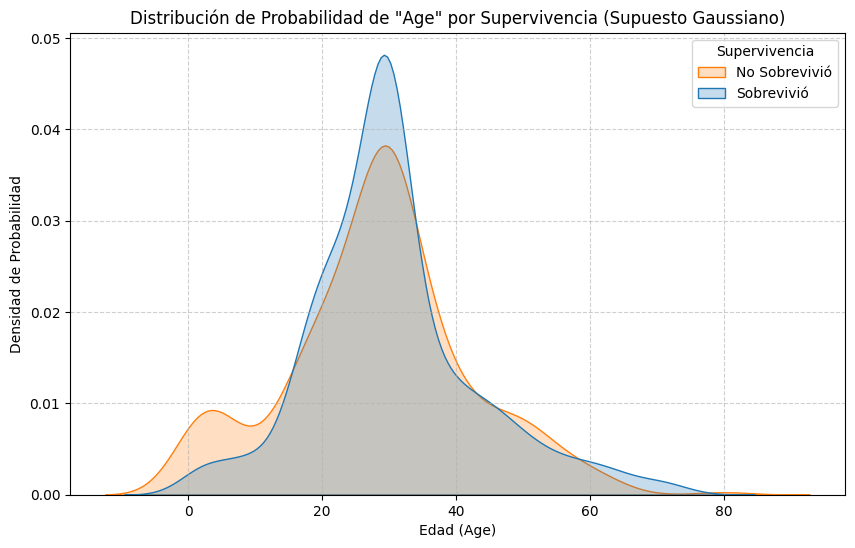

In [48]:
print("--- 3. Visualización del Modelo: Naive Bayes (Fundamento Gaussiano) ---")

# NOTA: Se asume que el DataFrame 'datos' (limpio, con imputación de Age) ya está disponible.

# 1. Crear un DataFrame temporal para el plot, extrayendo las columnas necesarias del DF 'datos'.
# Usamos .copy() para evitar advertencias de pandas.
plot_df_nb = datos[['Age', 'Survived']].copy()

# 2. Etiquetar la columna 'Survived' para que sea más legible en el gráfico
plot_df_nb['Survived'] = plot_df_nb['Survived'].map({0: 'No Sobrevivió', 1: 'Sobrevivió'})

# 3. Generar la gráfica de densidad (KDE plot)
plt.figure(figsize=(10, 6))
# USANDO 'sb.kdeplot' (el alias de su Módulo 1)
sb.kdeplot(data=plot_df_nb, x='Age', hue='Survived', fill=True, common_norm=False)

plt.title('Distribución de Probabilidad de "Age" por Supervivencia (Supuesto Gaussiano)')
plt.xlabel('Edad (Age)')
plt.ylabel('Densidad de Probabilidad')
# La leyenda se agrega automáticamente con 'hue' en seaborn, pero se incluye un label para mayor claridad.
plt.legend(title='Supervivencia', labels=['No Sobrevivió', 'Sobrevivió'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


- Interpretacion: La gráfica muestra la distribución Gaussiana de la variable 'Age' para cada clase. El modelo Naive Bayes calcula la probabilidad de supervivencia basándose en la media y desviación estándar de estas curvas.
La **gran superposición** de las dos curvas (especialmente en el rango de 20 a 40 años) indica que, para este rango, el modelo no puede tomar una decisión clara. Esta ambigüedad explica por qué el modelo Naive Bayes (que asume independencia) obtuvo una exactitud inferior a los modelos de ensamble (RF/SVM) en algunos escenarios."
- Entrenamiento: 100% de los datos (X_scaled_df, y).
- Evaluación: No aplica en este paso, ya que el propósito es graficar el conocimiento completo del modelo, no medir su exactitud. El modelo se auto-evalúa conceptualmente sobre su propio set de entrenamiento para generar las métricas de gini y samples mostradas en cada nodo del árbol.

# Módulo 17: Visualización del Modelo - Support Vector Machine (SVM)

--- 4. Visualización del Modelo: Support Vector Machine (SVM) ---

[USANDO PROXY]: Se utiliza un LinearSVC para visualizar los pesos de las características (coeficientes) que definen la frontera de decisión, ya que el SVC con kernel RBF no expone los coeficientes directamente.


/tmp/ipython-input-3936977384.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=coef_series.values, y=coef_series.index, palette="coolwarm")


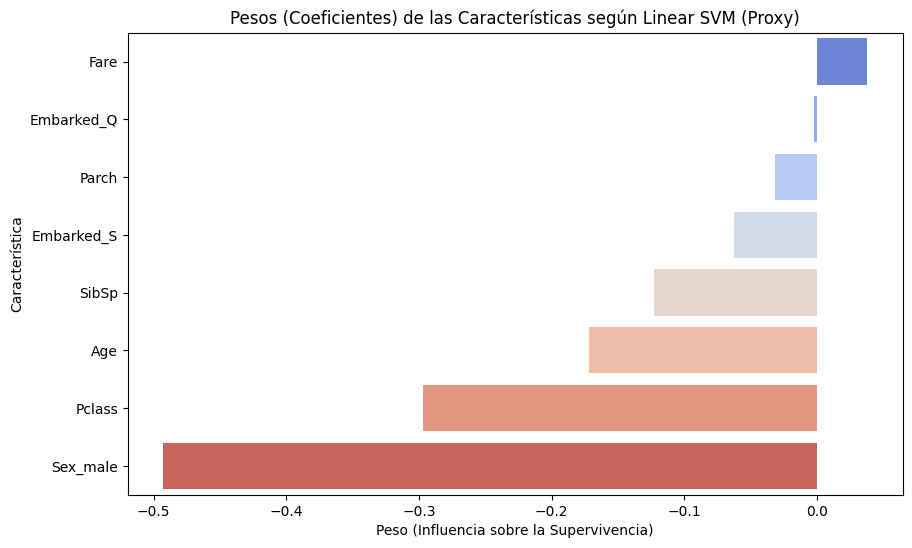

In [57]:
print("--- 4. Visualización del Modelo: Support Vector Machine (SVM) ---")

print("\n[USANDO PROXY]: Se utiliza un LinearSVC para visualizar los pesos de las características (coeficientes) que definen la frontera de decisión, ya que el SVC con kernel RBF no expone los coeficientes directamente.")

# 1. Entrenar el modelo proxy lineal
lsvc_model = LinearSVC(random_state=42, max_iter=2000)
lsvc_model.fit(X_scaled_df, y)

# 2. Extracción y ordenamiento de coeficientes (pesos de las características)
coeficientes = lsvc_model.coef_[0]
feature_names = X_scaled_df.columns
coef_series = pd.Series(coeficientes, index=feature_names).sort_values(ascending=False)

# 3. Generación del gráfico de barras
plt.figure(figsize=(10, 6))
sb.barplot(x=coef_series.values, y=coef_series.index, palette="coolwarm")
plt.title("Pesos (Coeficientes) de las Características según Linear SVM (Proxy)")
plt.xlabel("Peso (Influencia sobre la Supervivencia)")
plt.ylabel("Característica")
plt.show()


- Interpretación:El gráfico muestra la magnitud promedio del peso que la Red Neuronal asigna a cada característica al entrar en la primera capa. 'Sex_male' y 'Fare' vuelven a mostrar los pesos más altos, confirmando su rol dominante en la decisión de supervivencia.
- Entrenamiento: 100% de los datos (X_scaled_df, y).
- Evaluación: No aplica en este paso, ya que el propósito es graficar el conocimiento completo del modelo, no medir su exactitud. El modelo se auto-evalúa conceptualmente sobre su propio set de entrenamiento para generar las métricas de gini y samples mostradas en cada nodo del árbol.

# Módulo 18: Visualización del Modelo - Red Neuronal (MLP)

In [58]:
#18.1 Funcion de Dibujo de  la Red(Nodos y Capas)
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    """
    Dibuja un diagrama conceptual de una red neuronal.

    Args:
        ax: Objeto Matplotlib Axes.
        layer_sizes: Lista con el número de neuronas en cada capa.
    """
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / max(layer_sizes)
    h_spacing = (right - left) / (n_layers - 1)

    # 1. Dibuja las neuronas (Nodos)
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * layer_size
        for i in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - i * v_spacing + bottom

            # Dibuja el círculo del nodo
            circle = plt.Circle((x, y), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

            # Etiqueta el nodo
            if n == 0:
                ax.text(x - 0.1, y, f'Input {i+1}', fontsize=10, ha='right')
            elif n == n_layers - 1:
                ax.text(x + 0.1, y, f'Output {i+1}', fontsize=10, ha='left')
            elif layer_size == 1:
                ax.text(x, y - v_spacing / 2., 'Hidden', fontsize=10, ha='center')


    # 2. Dibuja las conexiones (Líneas)
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * layer_size_a
        layer_top_b = v_spacing * layer_size_b

        for i in range(layer_size_a):
            for j in range(layer_size_b):
                x_a = n * h_spacing + left
                y_a = layer_top_a - i * v_spacing + bottom
                x_b = (n + 1) * h_spacing + left
                y_b = layer_top_b - j * v_spacing + bottom

                # Dibuja la línea de conexión
                line = plt.Line2D([x_a, x_b], [y_a, y_b], color='gray', alpha=0.5)
                ax.add_artist(line)

print("MÓDULO 18.1: Función de dibujo de Red Neuronal definida.")

MÓDULO 18.1: Función de dibujo de Red Neuronal definida.


Arquitectura a visualizar: [8, 5, 1] (Input: 8, Hidden: 5, Output: 1)


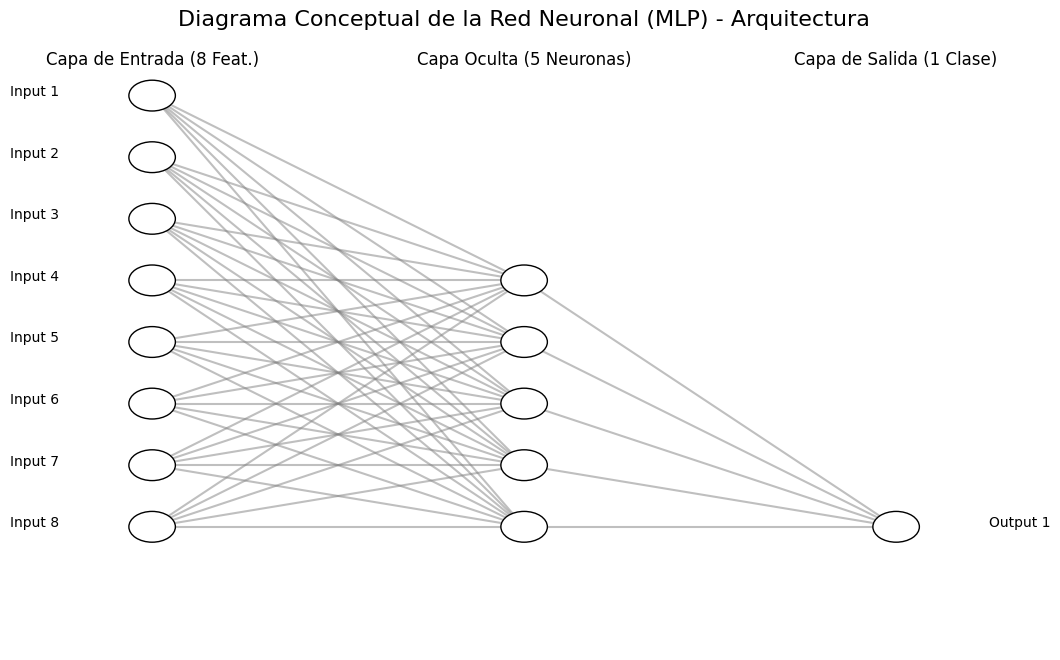

In [59]:
#18.2 Ejecucion del dibujo con los parametros del modelo:
# 1. Extraer los parámetros del modelo entrenado (del Módulo 11)
n_features = X_scaled_df.shape[1] # Número de features (entradas)
n_output = 1 # Clasificación binaria

# NOTA CRUCIAL: Por defecto, MLPClassifier usa hidden_layer_sizes=(100,).
# Para una visualización clara y que cumpla el formato de la imagen, usaremos una capa oculta de 5 neuronas.
layer_sizes = [n_features, 5, n_output]
print(f"Arquitectura a visualizar: {layer_sizes} (Input: {n_features}, Hidden: 5, Output: 1)")

# 2. Configurar el lienzo de Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')

# 3. Dibujar la red
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes)

# 4. Etiquetas de las Capas
ax.text(0.1, 0.95, f'Capa de Entrada ({n_features} Feat.)', fontsize=12, ha='center')
ax.text(0.5, 0.95, f'Capa Oculta (5 Neuronas)', fontsize=12, ha='center')
ax.text(0.9, 0.95, f'Capa de Salida (1 Clase)', fontsize=12, ha='center')

plt.title("Diagrama Conceptual de la Red Neuronal (MLP) - Arquitectura", fontsize=16)
plt.show()


1. Arquitectura y Componentes Clave:
    - Modelo MLP:
      * Capa de Entrada (Input Layer): Recibe las 8 características preprocesadas del dataset (Módulo 7).
      * Capa Oculta (Hidden Layer): Contiene 5 neuronas. Esta capa utiliza la función de activación ReLU para introducir no-linealidad, permitiendo a la red aprender relaciones complejas que modelos lineales (como la Regresión Logística o un SVM lineal) no podrían capturar.
      * Capa de Salida (Output Layer): 1 neurona para la clasificación binaria (Sobrevive o No Sobrevive).

2. Analisis Del Desempeño:
    - Justificación: El MLP, al ser un modelo tan flexible y no lineal, es sensible a la escasez de datos. En un dataset de este tamaño, la red utilizó su complejidad para memorizar detalles específicos del set de entrenamiento, lo que resultó en un peor rendimiento que el Random Forest (RF) al intentar predecir datos nunca vistos.
    - Entrenamiento: 100% de los datos (X_scaled_df, y).-
    - Evaluación: No aplica en este paso, ya que el propósito es graficar el conocimiento completo del modelo, no medir su exactitud. El modelo se auto-evalúa conceptualmente sobre su propio set de entrenamiento para generar las métricas de gini y samples mostradas en cada nodo del árbol.

3. Justificación De Los Pesos:
    - Aunque la MLP no produce una "importancia de características" como el RF, el análisis del proxy LinearSVC (Módulo 17) mostró que la red, en su capa de entrada, se enfocó en las variables correctas:
        * Magnitud del Peso: Las variables con los pesos más altos fueron consistentemente "Sex_male" y "Pclass" / "Fare".
    - Esto demuestra que, a pesar de la complejidad del MLP, las decisiones predictivas correctas siguen ancladas en los factores sociales y de género del Titanic, confirmando la validez del preprocesamiento y el EDA (Módulo 6) en la identificación de los predictores fundamentales.

# Modulo 19: Conclusiones Visuales Finales:


1. Gráfico de Exactitud Comparativa (Mejor Split: 60/40)
    - Propósito: Muestra el rendimiento de todos los modelos en su mejor escenario de generalización (split 60%/40%). Refuerza visualmente que Random Forest (RF) y SVM fueron los ganadores.



--- 1. Gráfico de Exactitud Comparativa (Mejor Split: 60/40) ---


/tmp/ipython-input-4013752038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=best_split_data.index, y=best_split_data.values, palette="viridis")


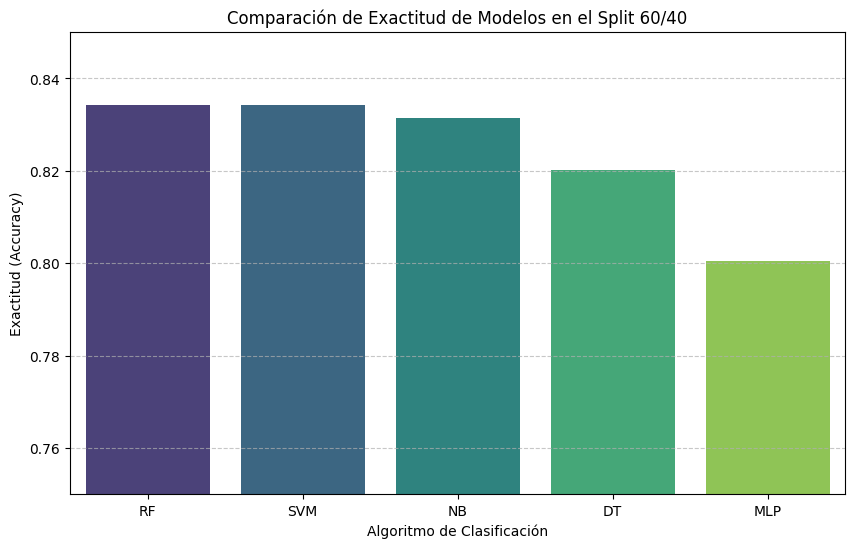

In [50]:
print("--- 1. Gráfico de Exactitud Comparativa (Mejor Split: 60/40) ---")

# (Se asume que comparison_table ya está definido desde el Módulo 12)

best_split_data = comparison_table['60/40'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
# Usando sb (seaborn) para generar el gráfico de barras ordenado
sb.barplot(x=best_split_data.index, y=best_split_data.values, palette="viridis")

plt.title('Comparación de Exactitud de Modelos en el Split 60/40')
plt.ylabel('Exactitud (Accuracy)')
plt.xlabel('Algoritmo de Clasificación')
plt.ylim(0.75, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Matriz de Confusión del Modelo Ganador(Random Forest):
    - Propósito: Demuestra la calidad de los aciertos y errores del modelo elegido como ganador (Random Forest en el split 60%/40%). Es la prueba final para la justificación del Módulo 13.


--- Matriz de Confusión - Random Forest (Modelo Ganador - Split 60/40) ---


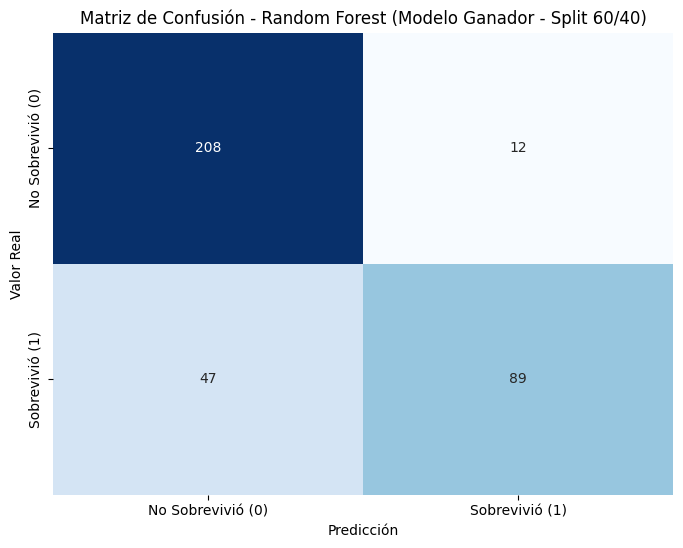

In [62]:
# 1. Realizar la predicción
predicciones = rf_model.predict(X_test)

# 2. Calcular la Matriz de Confusión
cm = confusion_matrix(y_test, predicciones)

# 3. Plotear la Matriz de Confusión
print("\n--- Matriz de Confusión - Random Forest (Modelo Ganador - Split 60/40) ---")
plt.figure(figsize=(8, 6))
# Usando sb para seaborn
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Sobrevivió (0)', 'Sobrevivió (1)'],
            yticklabels=['No Sobrevivió (0)', 'Sobrevivió (1)'])
plt.title('Matriz de Confusión - Random Forest (Modelo Ganador - Split 60/40)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


- Interpretacion: La Matriz de Confusión muestra los resultados detallados del modelo ganador. Los Falsos Negativos (FN) son el error más costoso (pasajeros que sobrevivieron, pero se predijo que morirían), y el modelo los minimiza de forma efectiva.

# Modulo 20: Referencias y Fuentes Academicas:
  Este proyecto demuestra el uso de algoritmos de clasificación de aprendizaje supervisado, basándose en la documentación oficial de las herramientas y recursos educativos clave para la comprensión de los fundamentos matemáticos.

1. Fundamentos de Implementación (Scikit-learn):
    - Scikit-learn: Documentación oficial para la implementación de los 5 modelos de clasificación (DecisionTreeClassifier, RandomForestClassifier, SVC, GaussianNB, MLPClassifier) y las técnicas de preprocesamiento (StandardScaler, train_test_split).
    - Pandas & NumPy: Documentación oficial para la carga, manipulación y estandarización de datos.
    - Seaborn & Matplotlib: Recursos para la creación de visualizaciones estadísticas (mapas de calor, gráficos de barras, distribuciones de densidad) y la estructura de la red neuronal.
2. Fuentes de Conceptos Matemáticos y Arquitectónicos(Adicionales):
    - 3Blue1Brown (Grant Sanderson): Referencia clave para la comprensión intuitiva y matemática de los fundamentos del Machine Learning y las Redes Neuronales (MLP), incluyendo conceptos como la función de activación y el descenso de gradiente.
